In [ ]:
!pip install -U -q PyDrive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import json
import argparse 

import numpy as np
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dropout, TimeDistributed, Dense, Activation, Embedding

In [ ]:
!ls /content/drive/MyDrive/FYP/Data/

 ashover.txt	 jigs.txt      'reels A-C.txt'	'reels M-Q.txt'   slip.txt
 hornpipes.txt	 morris.txt    'reels D-G.txt'	'reels R-T.txt'   waltez.txt
 input.txt	 playford.txt  'reels H-L.txt'	'reels u-z.txt'


In [ ]:
data = []
text = ''
for i, (dirpath, dirnames, filenames) in enumerate(os.walk('/content/drive/MyDrive/FYP/Data/', topdown=False)):
    # print(i, dirpath, dirnames, filenames)
    for f in filenames: #f = name of file, not full file path 
        file_path = os.path.join(dirpath, f)
        print(file_path)
        file1 = open(file_path,"r")
        txt=file1.read()
        text = text + txt
        data.append(txt)

/content/drive/MyDrive/FYP/Data/reels M-Q.txt
/content/drive/MyDrive/FYP/Data/morris.txt
/content/drive/MyDrive/FYP/Data/reels H-L.txt
/content/drive/MyDrive/FYP/Data/reels A-C.txt
/content/drive/MyDrive/FYP/Data/reels D-G.txt
/content/drive/MyDrive/FYP/Data/input.txt
/content/drive/MyDrive/FYP/Data/playford.txt
/content/drive/MyDrive/FYP/Data/jigs.txt
/content/drive/MyDrive/FYP/Data/hornpipes.txt
/content/drive/MyDrive/FYP/Data/reels R-T.txt
/content/drive/MyDrive/FYP/Data/slip.txt
/content/drive/MyDrive/FYP/Data/ashover.txt
/content/drive/MyDrive/FYP/Data/waltez.txt
/content/drive/MyDrive/FYP/Data/reels u-z.txt


In [ ]:
data

['\nX: 1\nT:Madness !\n% Nottingham Music Database\nS:Chris Dewhurst (1983), via PR\nM:4/4\nL:1/4\nK:F\nA,"C7"B, =B,|"F"C3/2C/2 DC|"F"A2 A2|"C7""g"C3/2C/2 " ""c"DC|\\\n"C7""g"B2 -" ""c"B2|"Gm"C3/2C/2 DC|"C7"c3/2c/2 =Bc|"F"AF "Dm"ED|"Gm"CA, "C7"B,=B,|\n"F"C3/2C/2 DC|"F"A2 A2|"C7""g"C3/2C/2 " ""c"DC|"Gm"B2 -"C7"B2|\\\n"F"c3/2A/2 "F7"GF|"Bb"DF FG|"F""c"A2 "C7"G2|"F"FF "F7"GA||\n"Bb"B3/2B/2 Bc|dD FB|"F"A3/2A/2 AB|"Am"c3A|"Dm"F3/2F/2 FG|"G7"AG A=B|\\\n"C7"dc "Gm"BG|\n"C"E_E "C7"D_D|"F"C3/2C/2 DC|"F"A2 A2|"C7""g"C3/2C/2 " ""c"DC|"Gm"B2 -"C7"B2|\\\n"F"c3/2A/2 "F7"GF|"Bb"DF FG|"F""c"A2 "C7"G2|"F"F||\n\n\nX: 2\nT:When You And I Were Young Maggie\n% Nottingham Music Database\nS:via PR\nM:2/4\nL:1/4\nK:G\nd/2|"G"d B/2A/2|"G7"G A/2G/2|"C"G2|E/2GE/2|"G"D G/2A/2|"Em"B d/2B/2|"Am"A2-|\\\n"D7"A3/2d/2|\n"G"d B/2A/2|"G7"G A/2G/2|"C"G2|E/2GE/2|"G"D G/2B/2|"D7"d A/2B/2|"G"G2-|G3/2e/2\\\n||\n"C"e c/2e/2|e c/2e/2|"G"d2|B/2dB/2|"D"A d|"A7"d/2^c/2 f/2e/2|"D"d2-|\\\n"D7"d3/2d/2|\n"G"d B/2A/2|"G7"G A/2G/2|"C"G2

In [ ]:
text

'\nX: 1\nT:Madness !\n% Nottingham Music Database\nS:Chris Dewhurst (1983), via PR\nM:4/4\nL:1/4\nK:F\nA,"C7"B, =B,|"F"C3/2C/2 DC|"F"A2 A2|"C7""g"C3/2C/2 " ""c"DC|\\\n"C7""g"B2 -" ""c"B2|"Gm"C3/2C/2 DC|"C7"c3/2c/2 =Bc|"F"AF "Dm"ED|"Gm"CA, "C7"B,=B,|\n"F"C3/2C/2 DC|"F"A2 A2|"C7""g"C3/2C/2 " ""c"DC|"Gm"B2 -"C7"B2|\\\n"F"c3/2A/2 "F7"GF|"Bb"DF FG|"F""c"A2 "C7"G2|"F"FF "F7"GA||\n"Bb"B3/2B/2 Bc|dD FB|"F"A3/2A/2 AB|"Am"c3A|"Dm"F3/2F/2 FG|"G7"AG A=B|\\\n"C7"dc "Gm"BG|\n"C"E_E "C7"D_D|"F"C3/2C/2 DC|"F"A2 A2|"C7""g"C3/2C/2 " ""c"DC|"Gm"B2 -"C7"B2|\\\n"F"c3/2A/2 "F7"GF|"Bb"DF FG|"F""c"A2 "C7"G2|"F"F||\n\n\nX: 2\nT:When You And I Were Young Maggie\n% Nottingham Music Database\nS:via PR\nM:2/4\nL:1/4\nK:G\nd/2|"G"d B/2A/2|"G7"G A/2G/2|"C"G2|E/2GE/2|"G"D G/2A/2|"Em"B d/2B/2|"Am"A2-|\\\n"D7"A3/2d/2|\n"G"d B/2A/2|"G7"G A/2G/2|"C"G2|E/2GE/2|"G"D G/2B/2|"D7"d A/2B/2|"G"G2-|G3/2e/2\\\n||\n"C"e c/2e/2|e c/2e/2|"G"d2|B/2dB/2|"D"A d|"A7"d/2^c/2 f/2e/2|"D"d2-|\\\n"D7"d3/2d/2|\n"G"d B/2A/2|"G7"G A/2G/2|"C"G2|

In [ ]:
!ls /content/drive/MyDrive/FYP/Weights2

In [ ]:
MODEL_DIR = '/content/drive/MyDrive/FYP/Weights2'
def save_weights(epoch, model):
    if not os.path.exists(MODEL_DIR):
        os.makedirs(MODEL_DIR)
    model.save_weights(os.path.join(MODEL_DIR, 'weights.{}.h5'.format(epoch)))

In [ ]:
def load_weights(epoch, model):
    model.load_weights(os.path.join(MODEL_DIR, 'weights.{}.h5'.format(epoch)))

In [ ]:
BATCH_SIZE = 207
SEQ_LENGTH = 64

def read_batches(T, vocab_size):
    length = T.shape[0]; 
    batch_chars = int(length / BATCH_SIZE);

    for start in range(0, batch_chars - SEQ_LENGTH, SEQ_LENGTH):
        X = np.zeros((BATCH_SIZE, SEQ_LENGTH))
        Y = np.zeros((BATCH_SIZE, SEQ_LENGTH, vocab_size)) 
        for batch_idx in range(0, BATCH_SIZE): 
            for i in range(0, SEQ_LENGTH): 
                X[batch_idx, i] = T[batch_chars * batch_idx + start + i] # 
                Y[batch_idx, i, T[batch_chars * batch_idx + start + i + 1]] = 1
        yield X, Y
        

In [ ]:

def build_model(batch_size, seq_len, vocab_size):
    model = Sequential()
    model.add(Embedding(vocab_size, 512, batch_input_shape=(batch_size, seq_len)))
    for i in range(4):
        model.add(LSTM(256, return_sequences=True, stateful=True))
        model.add(Dropout(0.2))

    model.add(TimeDistributed(Dense(vocab_size))) 
    model.add(Activation('softmax'))
    return model

In [ ]:
def train(text, epochs):


    char_to_idx = { ch: i for (i, ch) in enumerate(sorted(list(set(text)))) }
    print("Number of unique characters: " + str(len(char_to_idx))) #95
    
    with open('/content/drive/MyDrive/FYP/char_to_idx2.json', 'w') as f:
        json.dump(char_to_idx, f)

    idx_to_char = { i: ch for (ch, i) in char_to_idx.items() }
    vocab_size = len(char_to_idx)

  
    model = build_model(BATCH_SIZE, SEQ_LENGTH, vocab_size)
        model.summary()
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


    T = np.asarray([char_to_idx[c] for c in text], dtype=np.int32) 

    print("Length of text:" + str(T.size)) 

    steps_per_epoch = (len(text) / BATCH_SIZE - 1) / SEQ_LENGTH  

    loss_list = []
    accuracy_list = []

    for epoch in range(epochs):
        print('\nEpoch {}/{}'.format(epoch + 1, epochs))
        
        losses, accs = [], []

        for i, (X, Y) in enumerate(read_batches(T, vocab_size)):
            
            #print(X);

            loss, acc = model.train_on_batch(X, Y)
            print('Batch {}: loss = {}, acc = {}'.format(i + 1, loss, acc))
            losses.append(loss)
            accs.append(acc)
        loss_list.append(losses)
        accuracy_list.append(accs)
    
        save_weights(epoch, model)
        print('Saved checkpoint to', 'weights.{}.h5'.format(epoch))
    return loss_list, accuracy_list


In [ ]:
epochs=200
loss, accuracy = train(text,epochs)

Number of unique characters: 95
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (207, 64, 512)            48640     
_________________________________________________________________
lstm_16 (LSTM)               (207, 64, 256)            787456    
_________________________________________________________________
dropout_16 (Dropout)         (207, 64, 256)            0         
_________________________________________________________________
lstm_17 (LSTM)               (207, 64, 256)            525312    
_________________________________________________________________
dropout_17 (Dropout)         (207, 64, 256)            0         
_________________________________________________________________
lstm_18 (LSTM)               (207, 64, 256)            525312    
_________________________________________________________________
dropout_18 (Dropout)  

KeyboardInterrupt: ignored

In [ ]:
def build_sample_model(vocab_size):
    model = Sequential()
    model.add(Embedding(vocab_size, 512, batch_input_shape=(1, 1)))
    for i in range(4):
        model.add(LSTM(256, return_sequences=(i != 3), stateful=True))
        model.add(Dropout(0.2))

    model.add(Dense(vocab_size))
    model.add(Activation('softmax'))
    
    return model

In [ ]:
def sample(epoch, header, num_chars):
    with open('/content/drive/MyDrive/FYP/char_to_idx2.json') as f:
        char_to_idx = json.load(f)
    idx_to_char = { i: ch for (ch, i) in char_to_idx.items() }
    vocab_size = len(char_to_idx)

    model = build_sample_model(vocab_size)
    load_weights(epoch, model)
    model.save(os.path.join(MODEL_DIR, 'model.{}.h5'.format(epoch)))

    sampled = [char_to_idx[c] for c in header]
    print(sampled)
    

    for i in range(num_chars):
        batch = np.zeros((1, 1))
        if sampled:
            batch[0, 0] = sampled[-1]
        else:
            batch[0, 0] = np.random.randint(vocab_size)
        result = model.predict_on_batch(batch).ravel()
        sample = np.random.choice(range(vocab_size), p=result)
        sampled.append(sample)

    return ''.join(idx_to_char[c] for c in sampled)

In [ ]:
epoch=199 
seed=''
length=600 
x = sample(epoch,seed,length)
print(x)

[]
:lnatt
K:G
D2 \
| G6 (GA) | Bcde d2BA | B2(de) gedc | B2G2 G3 (c/d/) |
eedc dcBA | GEDE G2(ge) | dBGB AGED | E2(AG) G2 ||


X:540
T:Dennis and Hills wo Mesliverrick
M:3/4
L:1/8
B:O'Neill's 522
N:"Slow" "collected by F. O'Neill"
Z:Transcribed by Dave Wooldridge
K:G
d2 \
| d3 e (dB)(AG) | g2 (ag) f3 e | dcBA G2 (FG) | A2 DD D2 zA |
B2 (B>A G>B) (ef/g/) | (ea)(ge) (df)(ed) | (ed)(BG) (A{BA}G) z G | (E>A) (G>A) B3 G/E |
| G>ABB d2 cA | B>ABd He2 d>c | Bdge dBAB | G4 G2 ||
D2 \
| Bdef g3 a | (.g/b/a) d.e .f2 (dB) | .G.F .G2 .D2 (DB) | .A(B>cd) ">"(de)(dc) |
("~"BAGA) BcdB | {d}cBcd He2 (de) | =fdBe


In [ ]:
print(len(loss))
print(len(accuracy))

200
200


In [ ]:
import statistics
import matplotlib.pyplot as plt

In [ ]:
# statistics.mean(loss[0])  
loss_avg = []
loss_median = []
loss_std = []
loss_variance = []
loss_max = []
loss_min = []
for l in loss:
  loss_avg.append(statistics.mean(l))
  loss_median.append(statistics.median(l))
  loss_std.append(statistics.stdev(l))
  loss_variance.append(statistics.variance(l))
  loss_max.append(max(l))
  loss_min.append(min(l))

In [ ]:
plt.style.use('seaborn-darkgrid')

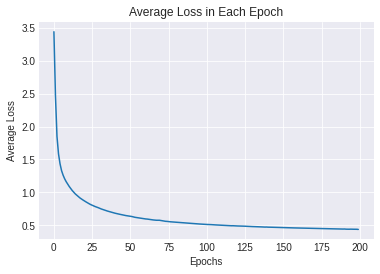

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.plot( [i for i in range(0,200)], loss_avg);
ax.set(xlabel='Epochs', ylabel='Average Loss',title='Average Loss in Each Epoch');

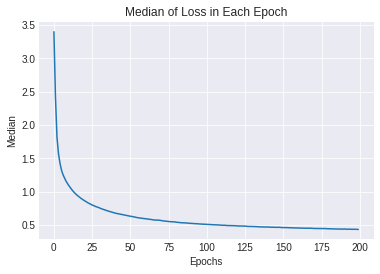

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.plot( [i for i in range(0,200)], loss_median);
ax.set(xlabel='Epochs', ylabel='Median',title='Median of Loss in Each Epoch');

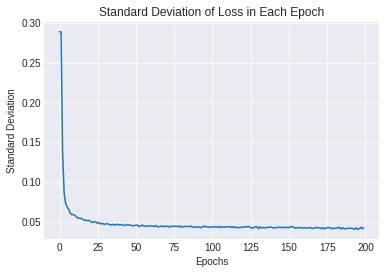

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.plot( [i for i in range(0,200)], loss_std);
ax.set(xlabel='Epochs', ylabel='Standard Deviation',title='Standard Deviation of Loss in Each Epoch');

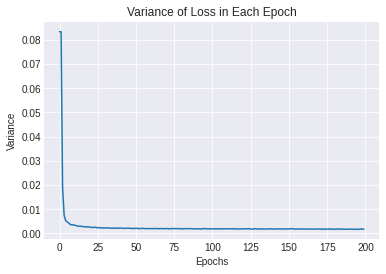

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.plot( [i for i in range(0,200)], loss_variance);
ax.set(xlabel='Epochs', ylabel='Variance',title='Variance of Loss in Each Epoch');

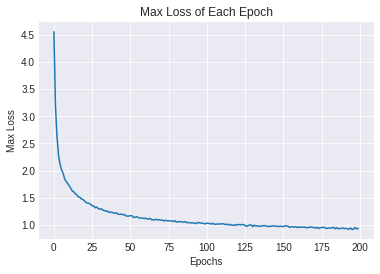

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.plot( [i for i in range(0,200)], loss_max);
ax.set(xlabel='Epochs', ylabel='Max Loss',title='Max Loss of Each Epoch');

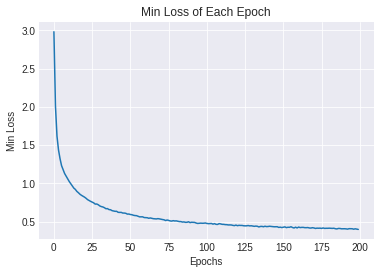

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.plot( [i for i in range(0,200)], loss_min);
ax.set(xlabel='Epochs', ylabel='Min Loss',title='Min Loss of Each Epoch');

In [ ]:
acc_avg = []
acc_median = []
acc_std = []
acc_variance = []
acc_max = []
acc_min = []
for a in accuracy:
  acc_avg.append(statistics.mean(a))
  acc_median.append(statistics.median(a))
  acc_std.append(statistics.stdev(a))
  acc_variance.append(statistics.variance(a))
  acc_max.append(max(a))
  acc_min.append(min(a))


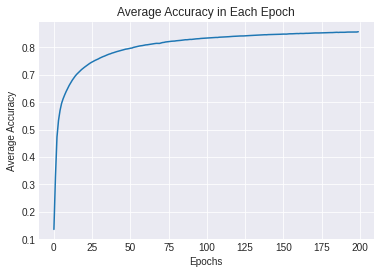

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.plot( [i for i in range(0,200)], acc_avg);
ax.set(xlabel='Epochs', ylabel='Average Accuracy',title='Average Accuracy in Each Epoch');

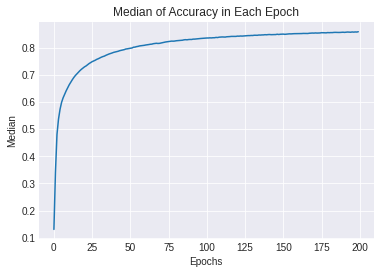

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.plot( [i for i in range(0,200)], acc_median);
ax.set(xlabel='Epochs', ylabel='Median',title='Median of Accuracy in Each Epoch');

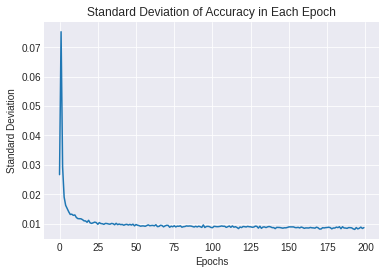

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.plot( [i for i in range(0,200)], acc_std);
ax.set(xlabel='Epochs', ylabel='Standard Deviation',title='Standard Deviation of Accuracy in Each Epoch');

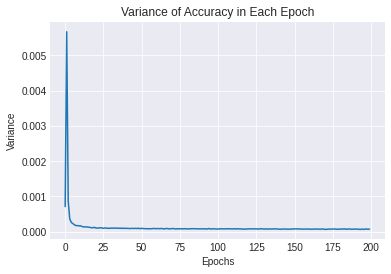

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.plot( [i for i in range(0,200)], acc_variance);
ax.set(xlabel='Epochs', ylabel='Variance',title='Variance of Accuracy in Each Epoch');

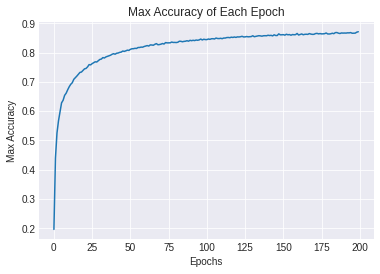

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.plot( [i for i in range(0,200)], acc_max);
ax.set(xlabel='Epochs', ylabel='Max Accuracy',title='Max Accuracy of Each Epoch');

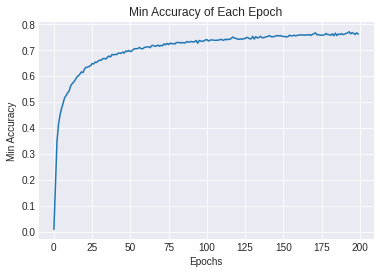

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.plot( [i for i in range(0,200)], acc_min);
ax.set(xlabel='Epochs', ylabel='Min Accuracy',title='Min Accuracy of Each Epoch');

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
print(len(loss))
print(len(accuracy))


200
200


In [ ]:
batch = len(loss[0])
batch

161

In [ ]:
epocs = len(loss)
epocs

200

In [ ]:
batch_name = [f'batch_{i}' for i in  range(batch)]

In [ ]:
loss_df = pd.DataFrame(loss)
loss_df.columns = batch_name
loss_df

batch_0   batch_1   batch_2  ...  batch_158  batch_159  batch_160
0    4.553384  4.532303  4.439607  ...   3.017579   2.996534   2.982339
1    3.196903  2.963035  2.942611  ...   2.123698   2.078725   2.048689
2    2.628592  2.061213  2.085426  ...   1.727126   1.696668   1.666674
3    2.285028  1.675315  1.710203  ...   1.542705   1.519713   1.472593
4    2.118803  1.484730  1.522424  ...   1.411211   1.409194   1.348870
..        ...       ...       ...  ...        ...        ...        ...
195  0.920703  0.448115  0.437906  ...   0.430263   0.447550   0.432683
196  0.926937  0.438981  0.447705  ...   0.424635   0.451767   0.431111
197  0.955642  0.445485  0.450392  ...   0.437548   0.453100   0.433008
198  0.929275  0.452945  0.443220  ...   0.442311   0.433213   0.429049
199  0.941326  0.436724  0.438758  ...   0.437034   0.450451   0.431681

[200 rows x 161 columns]

In [ ]:
accuracy_df = pd.DataFrame(accuracy)
accuracy_df.columns = batch_name
accuracy_df

batch_0   batch_1   batch_2  ...  batch_158  batch_159  batch_160
0    0.008454  0.132473  0.134058  ...   0.185839   0.193086   0.195954
1    0.176253  0.195199  0.204559  ...   0.407986   0.427159   0.430556
2    0.348732  0.427914  0.422026  ...   0.494565   0.505359   0.517437
3    0.413647  0.510266  0.501736  ...   0.537817   0.545969   0.564840
4    0.449955  0.558122  0.543478  ...   0.570199   0.573143   0.591486
..        ...       ...       ...  ...        ...        ...        ...
195  0.768116  0.853789  0.855827  ...   0.861111   0.852506   0.858545
196  0.764568  0.855148  0.854846  ...   0.861262   0.851223   0.858016
197  0.760945  0.855072  0.850996  ...   0.858092   0.850996   0.859903
198  0.767059  0.854544  0.850770  ...   0.854695   0.856431   0.858922
199  0.762077  0.857412  0.855299  ...   0.857488   0.851298   0.860658

[200 rows x 161 columns]

In [ ]:
!ls /content/drive/MyDrive/FYP/Evaluation/

accuracy_csv1.csv  accuracy_csv2.csv  loss_csv1.csv  loss_csv2.csv


In [ ]:
loss_df.to_csv(r'/content/drive/MyDrive/FYP/Evaluation/loss_csv2.csv', index = True, index_label='Epocs')

In [ ]:
accuracy_df.to_csv(r'/content/drive/MyDrive/FYP/Evaluation/accuracy_csv2.csv', index = True, index_label='Epocs')